importing  the dependicies

In [49]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import  train_test_split
from PIL import Image


dataset structure

In [50]:
DATASET_PATH = r"C:/Users/Asus/OneDrive/Documents/ml project datasets/Brain_MRI/kaggle_3m"
items = os.listdir(DATASET_PATH)
print(items)

['TCGA_CS_4941_19960909', 'TCGA_CS_4942_19970222', 'TCGA_CS_4943_20000902', 'TCGA_CS_4944_20010208', 'TCGA_CS_5393_19990606', 'TCGA_CS_5395_19981004', 'TCGA_CS_5396_20010302', 'TCGA_CS_5397_20010315', 'TCGA_CS_6186_20000601', 'TCGA_CS_6188_20010812', 'TCGA_CS_6290_20000917', 'TCGA_CS_6665_20010817', 'TCGA_CS_6666_20011109', 'TCGA_CS_6667_20011105', 'TCGA_CS_6668_20011025', 'TCGA_CS_6669_20020102', 'TCGA_DU_5849_19950405', 'TCGA_DU_5851_19950428', 'TCGA_DU_5852_19950709', 'TCGA_DU_5853_19950823', 'TCGA_DU_5854_19951104', 'TCGA_DU_5855_19951217', 'TCGA_DU_5871_19941206', 'TCGA_DU_5872_19950223', 'TCGA_DU_5874_19950510', 'TCGA_DU_6399_19830416', 'TCGA_DU_6400_19830518', 'TCGA_DU_6401_19831001', 'TCGA_DU_6404_19850629', 'TCGA_DU_6405_19851005', 'TCGA_DU_6407_19860514', 'TCGA_DU_6408_19860521', 'TCGA_DU_7008_19830723', 'TCGA_DU_7010_19860307', 'TCGA_DU_7013_19860523', 'TCGA_DU_7014_19860618', 'TCGA_DU_7018_19911220', 'TCGA_DU_7019_19940908', 'TCGA_DU_7294_19890104', 'TCGA_DU_7298_19910324',

filtering only the patient folders and excluding the data,README files

In [51]:
patients = []
for item in os.listdir(DATASET_PATH):
    full_path = os.path.join(DATASET_PATH, item)
    if os.path.isdir(full_path):
        patients.append(item)
print("number of patients folder : ", len(patients))
print("sample patient folder : ", patients[5])


number of patients folder :  110
sample patient folder :  TCGA_CS_5395_19981004


choosing one patient sample

In [52]:
sample_patient = patients[0]
patient_path = os.path.join(DATASET_PATH, sample_patient)
print("sample patient  ; ", sample_patient)

sample patient  ;  TCGA_CS_4941_19960909


In [53]:
sample_patient = patients[5]
patient_path = os.path.join(DATASET_PATH, sample_patient)
files = os.listdir(patient_path)
print(files)

['TCGA_CS_5395_19981004_1.tif', 'TCGA_CS_5395_19981004_10.tif', 'TCGA_CS_5395_19981004_10_mask.tif', 'TCGA_CS_5395_19981004_11.tif', 'TCGA_CS_5395_19981004_11_mask.tif', 'TCGA_CS_5395_19981004_12.tif', 'TCGA_CS_5395_19981004_12_mask.tif', 'TCGA_CS_5395_19981004_13.tif', 'TCGA_CS_5395_19981004_13_mask.tif', 'TCGA_CS_5395_19981004_14.tif', 'TCGA_CS_5395_19981004_14_mask.tif', 'TCGA_CS_5395_19981004_15.tif', 'TCGA_CS_5395_19981004_15_mask.tif', 'TCGA_CS_5395_19981004_16.tif', 'TCGA_CS_5395_19981004_16_mask.tif', 'TCGA_CS_5395_19981004_17.tif', 'TCGA_CS_5395_19981004_17_mask.tif', 'TCGA_CS_5395_19981004_18.tif', 'TCGA_CS_5395_19981004_18_mask.tif', 'TCGA_CS_5395_19981004_19.tif', 'TCGA_CS_5395_19981004_19_mask.tif', 'TCGA_CS_5395_19981004_1_mask.tif', 'TCGA_CS_5395_19981004_2.tif', 'TCGA_CS_5395_19981004_20.tif', 'TCGA_CS_5395_19981004_20_mask.tif', 'TCGA_CS_5395_19981004_2_mask.tif', 'TCGA_CS_5395_19981004_3.tif', 'TCGA_CS_5395_19981004_3_mask.tif', 'TCGA_CS_5395_19981004_4.tif', 'TCGA_CS

In [58]:
image_file = None
mask_file = None
for f in files:
    if f.endswith(".tif"):
        if "mask" in f.lower():
            mask_file = f
        else:
            image_file = f
image_file= image_file.replace("'", "")
mask_file = mask_file.replace("'", "")

print(image_file)
print(mask_file)


TCGA_CS_5395_19981004_9.tif
TCGA_CS_5395_19981004_9_mask.tif


In [63]:
image_path = os.path.join(patient_path, image_file)
mask_path = os.path.join(patient_path, mask_file)
image = np.array(Image.open(image_path))
mask = np.array(Image.open(mask_path))
# print(image_path)
# print(mask_path)
# print(os.path.exists(image_path))
# print(os.path.exists(mask_path))

#for checking
if image is None:
    raise ValueError("image not loaded")
if mask is None:
        raise ValueError("mask not loaded")


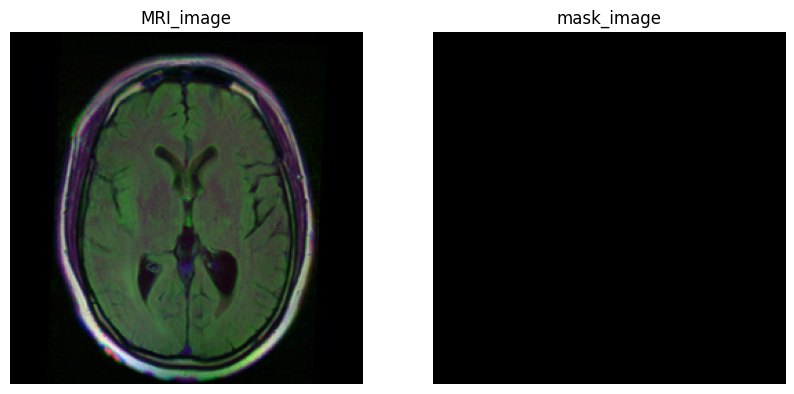

In [66]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("MRI_image")
plt.imshow(image,cmap="gray")
plt.axis('off')
plt.subplot(1,2,2)
plt.title("mask_image")
plt.imshow(mask,cmap="gray")
plt.axis('off')
plt.show()


In [67]:
print(image.shape)
print(mask.shape)
print(mask.min(),mask.max())

(256, 256, 3)
(256, 256)
0 0
